<a href="https://colab.research.google.com/github/MustafaBasit521/-Student-Score-Prediction/blob/main/student_score_polynomial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📊 Student Score Prediction - Polynomial Regression
This notebook demonstrates a **Polynomial Regression model** to predict students' exam scores using multiple features.

# Importing Libraries

In [ ]:

# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, root_mean_squared_error


## Loading the Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:

# Load Dataset
df = pd.read_csv("StudentPerformanceFactors.csv")
print(df.head())


   Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
0             23          84                  Low                High   
1             19          64                  Low              Medium   
2             24          98               Medium              Medium   
3             29          89                  Low              Medium   
4             19          92               Medium              Medium   

  Extracurricular_Activities  Sleep_Hours  Previous_Scores Motivation_Level  \
0                         No            7               73              Low   
1                         No            8               59              Low   
2                        Yes            7               91           Medium   
3                        Yes            8               98           Medium   
4                        Yes            6               65           Medium   

  Internet_Access  Tutoring_Sessions Family_Income Teacher_Quality  \
0             Ye

## Data Cleaning & Preprocessing

In [ ]:

# Drop missing values in important columns
df.dropna(subset=['Hours_Studied','Attendance','Tutoring_Sessions','Sleep_Hours','Previous_Scores','Exam_Score'], inplace=True)

# Fill missing values with column mean
for col in ['Hours_Studied','Attendance','Tutoring_Sessions','Sleep_Hours','Previous_Scores','Exam_Score']:
    df[col].fillna(df[col].mean(), inplace=True)

# Drop duplicate rows
df.drop_duplicates(inplace=True)

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

/tmp/ipython-input-3498034595.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


# Chosing the Features and Target

=> Then after chosing the features and target , scaling the features to a standard for better training of the data.


=> After that transforim=ng the features into polynomial for Polynomial Regression

In [ ]:

# Features and Target
X = df[['Hours_Studied','Attendance','Tutoring_Sessions','Sleep_Hours','Previous_Scores']]
y = df['Exam_Score']

# Scaling
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Polynomial Transformation
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_scaled)


# Splitting Data into Training and Testing

In [ ]:

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)


# Training Data

In [ ]:
# Train Model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

Predicting The Data

In [ ]:
# Predictions
y_pred = model.predict(X_test)

# Comparing Actual and Predicted Data

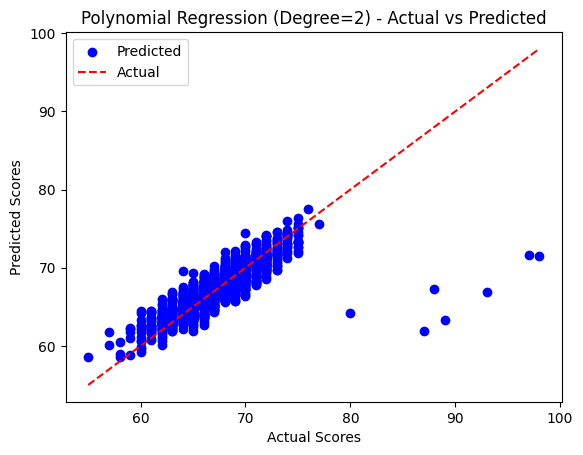

In [ ]:

# Visualization
plt.scatter(y_test, y_pred, color='blue', label='Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Actual')
plt.xlabel("Actual Scores")
plt.ylabel("Predicted Scores")
plt.legend()
plt.title("Polynomial Regression (Degree=2) - Actual vs Predicted")
plt.show()


# Evaluation Metrics

In [ ]:

# Evaluation Metrics
print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f}")
print(f"MSE: {mean_squared_error(y_test, y_pred):.2f}")
print(f"R² Score: {r2_score(y_test, y_pred):.2f}")
print(f"RMSE: {root_mean_squared_error(y_test,y_pred):.2f}")


MAE: 1.28
MSE: 5.10
R² Score: 0.64
RMSE: 2.26
